### Airline delays
* Source blog: https://towardsdatascience.com/learn-python-data-analytics-by-example-airline-arrival-delays-e26356e8ae6b
* Source data: https://github.com/nickdcox/learn-airline-delays
* US basemap files to be saved to same path: st99_d00.dbf, st99_d00.shp and st99_d00.shx and downloaded from URL: https://github.com/matplotlib/basemap/tree/master/examples

##### Data description: for delays_18 & delays_19
* |Column Name	|  Description
* date Year and month, in the format YYYY-M (e.g., 2018-1)
* carrier The two character designator for the carrier/airline.
* carrier_name	The full name of the carrier/airline.
* airport	The three character designator for the arrival airport.
* airport_name	The full name of the arrival airport.
* arr_flights	The total number of arriving flights for the carrier-airport pair for the month specified.
* arr_del15	The number of arriving flights that were delayed. Delayed is when a flight arrives more than 15 minutes later than the scheduled arrival time.
* carrier_ct	The number of arriving flights delayed due to a carrier issue.
* weather_ct	The number of arriving flights delayed due to a weather issue.
* nas_ct	The number of arriving flights delayed due to a national air system issue.
* security_ct	The number of arriving flights delayed due to a security issue.
* late_aircraft_ct	The number of arriving flights delayed due to an earlier late arrival of an aircraft.
* arr_cancelled	The number of cancelled flights.
* arr_diverted	The number of diverted flights.
* arr_delay	The total number of delayed minutes due to delays.
* carrier_delay	The total number of delayed minutes due to carrier issues.
* weather_delay	The total number of delayed minutes due to weather issues.
* nas_delay	The total number of delayed minutes due to national air system issues.
* security_delay	The total number of delayed minutes due to security issues.
* late_aircraft_delay	The total number of delayed minutes due to earlier later arrival of aircraft.

In [5]:
import pandas as pd

# Read the files and import all rows.
df_18 = pd.read_csv('delays_2018.csv')
df_19 = pd.read_csv('delays_2019.csv')

# Concatenate the 2018 and 2019 data into a single DataFrame.
df = pd.concat([df_18, df_19], ignore_index=True)

# Print out the number of rows imported from the files.
print('Number of Rows: ' + str(len(df_18) + len(df_19)))

Number of Rows: 41177


In [8]:
df.head()

,date,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-1,MQ,Envoy Air,BIS,"Bismarck/Mandan, ND: Bismarck Municipal",5.0,3.0,1.00,0.06,1.94,0.0,0.00,0.0,0.0,104.0,54.0,1.0,49.0,0.0,0.0
1,2018-1,MQ,Envoy Air,BNA,"Nashville, TN: Nashville International",110.0,21.0,7.17,1.16,6.76,0.0,5.92,3.0,0.0,897.0,344.0,37.0,226.0,0.0,290.0
2,2018-1,MQ,Envoy Air,BOI,"Boise, ID: Boise Air Terminal",32.0,8.0,0.22,0.35,5.61,0.0,1.82,0.0,0.0,353.0,9.0,18.0,233.0,0.0,93.0
3,2018-1,MQ,Envoy Air,BPT,"Beaumont/Port Arthur, TX: Jack Brooks Regional",63.0,11.0,1.75,1.08,2.98,0.0,5.19,3.0,0.0,657.0,83.0,34.0,130.0,0.0,410.0
4,2018-1,MQ,Envoy Air,BUF,"Buffalo, NY: Buffalo Niagara International",31.0,12.0,0.82,3.00,6.62,0.0,1.55,0.0,0.0,484.0,27.0,136.0,207.0,0.0,114.0


In [9]:
# Change the data type of the 'month' column to date and change the format to YYYY-M (e.g. 2018-1).
df['date'] = pd.to_datetime(df['date'], format='%Y-%m').dt.strftime('%Y-%m')

# Remove rows containing invalid data.
df = df[(df['date'] >= '2018-01') & (df['date'] <= '2019-12') & (df['arr_flights'].notnull())
              & (df['carrier'].notnull()) & (df['carrier_name'].notnull()) 
              & (df['airport'].notnull()) & (df['airport_name'].notnull())]

# Print out the number of rows remaining in the dataset.
print('Number of Rows: ' + str(len(df)))

Number of Rows: 41077


In [10]:
# Identify the airports in the state of Tennessee.
df['TN'] = df['airport_name'].apply(lambda x: x.find('TN'))

# Create a set of airport names (to eliminate the duplicates).
airports = set(df[df['TN'] != -1]['airport_name'])

# Display the list of airports.
print('Tennessee Airports:')
print(airports)

Tennessee Airports:
{'Chattanooga, TN: Lovell Field', 'Knoxville, TN: McGhee Tyson', 'Bristol/Johnson City/Kingsport, TN: Tri Cities', 'Nashville, TN: Nashville International', 'Memphis, TN: Memphis International'}


In [14]:
df.head()

,date,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,TN
0,2018-01,MQ,Envoy Air,BIS,"Bismarck/Mandan, ND: Bismarck Municipal",5.0,3.0,1.00,0.06,1.94,...,0.00,0.0,0.0,104.0,54.0,1.0,49.0,0.0,0.0,-1
1,2018-01,MQ,Envoy Air,BNA,"Nashville, TN: Nashville International",110.0,21.0,7.17,1.16,6.76,...,5.92,3.0,0.0,897.0,344.0,37.0,226.0,0.0,290.0,11
2,2018-01,MQ,Envoy Air,BOI,"Boise, ID: Boise Air Terminal",32.0,8.0,0.22,0.35,5.61,...,1.82,0.0,0.0,353.0,9.0,18.0,233.0,0.0,93.0,-1
3,2018-01,MQ,Envoy Air,BPT,"Beaumont/Port Arthur, TX: Jack Brooks Regional",63.0,11.0,1.75,1.08,2.98,...,5.19,3.0,0.0,657.0,83.0,34.0,130.0,0.0,410.0,-1
4,2018-01,MQ,Envoy Air,BUF,"Buffalo, NY: Buffalo Niagara International",31.0,12.0,0.82,3.00,6.62,...,1.55,0.0,0.0,484.0,27.0,136.0,207.0,0.0,114.0,-1


In [20]:
# Read the coordinates file and import all rows.
df_coords = pd.read_csv('airport_coordinates.csv')

# Create a new DataFrame with airport codes and names.
df_airports = df[['airport', 'airport_name']].drop_duplicates().reset_index(drop=True)

# Merge the coordinates DataFrame with the airports DataFrame.
df_airports = pd.merge(df_airports, df_coords, on='airport')

In [21]:
import matplotlib.pyplot as plt
import mpl_toolkits
mpl_toolkits.__path__.append('/usr/lib/python2.7/dist-packages/mpl_toolkits/')
from mpl_toolkits.basemap import Basemap

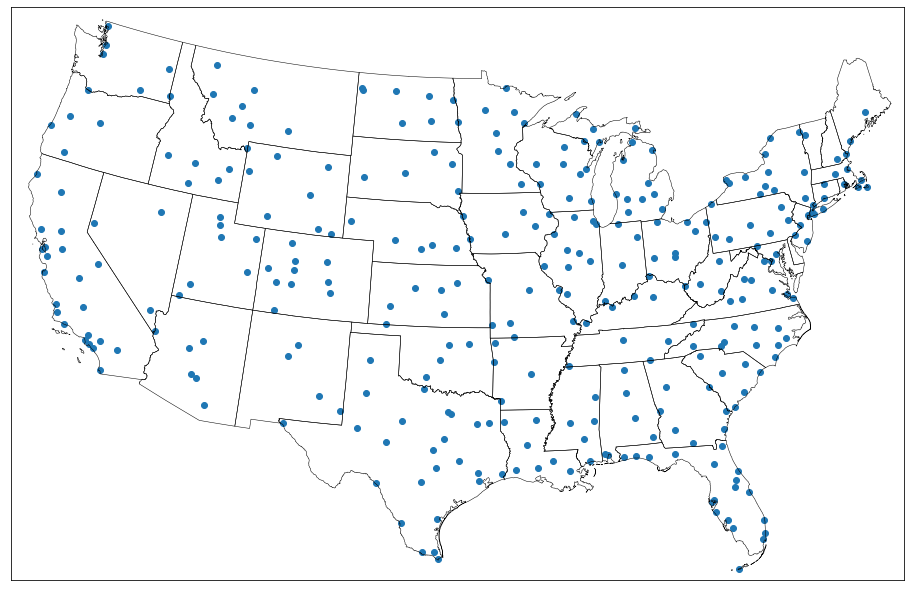

In [22]:
# Ready the Basemap for display.
fig = plt.figure(figsize=(16, 16))
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=32,lat_2=45,lon_0=-95)

# Load the shapefile to display the outlines of the US states.
m.readshapefile('st99_d00', name='states', drawbounds=True)

# Plot the airports on the map.
m.scatter(df_airports['long'].values, df_airports['lat'].values, latlon=True)
plt.show()

Cross tabulation is a method to quantitatively analyze the relationship between multiple variables. In this project we want to determine the number of diverted flights for each carrier-airport pair, for example: how many American Airlines flights scheduled to arrive at JFK airport in New York City were diverted? Using the crosstab() function of pandas we are able to create a single table that displays this for all carrier-airport pairs in our dataset.

* The first parameter that we pass is the carrier column from df, which will be the rows in our crosstab. 
* The second is the airport column, which will be the columns in our crosstab. 
* The third values that we want to display in the crosstab are the number of diverted flights, the arr_diverted column. 
* With the fourth parameter, we specify that we want to sum the number of diversions for each carrier-airport pair — this is required because each carrier-airport pair appears multiple times in the dataset, once per month. 
* Finally, we cap off the line of code with a call to the fillna() function to replace NaN values with blanks — this removes noise from the resulting crosstab and eases readability.
Only one line of code, but a very powerful one.

In [23]:
# Use crosstab to display the number of diverted flights for each carrier-airport pair, without null values.
pd.crosstab(df['carrier'], df['airport'], values=df['arr_diverted'], aggfunc='sum').fillna('')

airport,ABE,ABI,ABQ,ABR,ABY,ACK,ACT,ACV,ACY,ADK,...,VEL,VLD,VPS,WRG,WYS,XNA,XWA,YAK,YNG,YUM
carrier,,,,,,,,,,,,,,,,,,,,,
9E,1,,,,3,3,,,,,...,,2,1,,,10,,,,
AA,,,8,,,,,,,,...,,,10,,,1,,,,
AS,,,0,,,,,,,0,...,,,,9,,,,23,,
B6,,,2,,,11,,,,,...,,,,,,,,,,
DL,3,,0,,,,,,,,...,,,9,,,3,,,,
EV,5,,3,,,,,,,,...,,,7,,,9,,,,
F9,,,0,,,,,,,,...,,,,,,0,,,,
G4,9,,0,,,,,,,,...,,,5,,,2,,,0,
HA,,,,,,,,,,,...,,,,,,,,,,


In [24]:
# Display how many arrivals into JFK in 2019 encountered both weather and carrier delays.
# Subset DataFrame for planes arriving into JFK in 2019 with values in both the carrier_ct and weather_ct columns.
df_f = df[(df['date'] >= '2019-01') & (df['date'] <= '2019-12') & (df['airport'] == 'JFK') 
          & (df['carrier_ct'] > 0) & (df['weather_ct'] > 0)]

# Add together the sums of the two columns to obtain the total number of delays.

print("Number of Delays: " + str(df_f['carrier_ct'].sum()  + df_f['weather_ct'].sum()))

Number of Delays: 6919.429999999999


In [25]:
# Display the airline with the most flight cancellations as a percentage of total arriving flights.
# Create a DataFrame containing airline names, total arriving flights and number of cancelled flights.
df_flights = df.groupby('carrier_name')['arr_flights'].sum().reset_index(name='num_arrived')
df_cancelled = df.groupby('carrier_name')['arr_cancelled'].sum().reset_index(name='num_cancelled')
df_cancelled = pd.merge(df_cancelled, df_flights, on='carrier_name')

# Calculate the percentage of flights cancelled.
df_cancelled['proportion'] = df_cancelled['num_cancelled'] / df_cancelled['num_arrived'] * 100

# Display the airline with the most cancellations as a percentage of total arriving flights.
df_cancelled.sort_values(by=['proportion'], ascending=False).head(1)

,carrier_name,num_cancelled,num_arrived,proportion
7,ExpressJet Airlines LLC,4163.0,97099.0,4.287377


To calculate the overall average number of delays per airport, we first need to calculate the number of delays per airport and then find the average of those values. We are able to achieve this in one line of code. We group the rows in df by airport and sum the number of delayed arrivals into each airport. By adding a call to the mean() function on the end, we calculate the average of the sums.

In [26]:
# Determine the overall average number of delays per airport.
# Calculate the average number of delays per airport.
avg_delays = df.groupby('airport')['arr_del15'].sum().mean()

# Display average number of delays per airport.
print('Average Number of Delays per Airport: ' + str(avg_delays))

Average Number of Delays per Airport: 7544.997245179064


In [27]:
# Display the three carriers with the lowest number of delayed flights.
df.groupby('carrier')['arr_del15'].sum().nsmallest(3).reset_index(name='num_delays')

,carrier,num_delays
0,VX,3440.0
1,HA,18207.0
2,G4,42725.0


#### Interactive : 
* Request that the user input an airline. 
* Then plot the monthly number of national air system (NAS) delay minutes for that airline.
* Display whether the trend is increasing or decreasing over the last 2 months.

In [28]:
airline = input("What airline (9E, AA, AS, B6, DL, EV, F9, G4, HA, MQ, NK, OH, OO, UA, VX, WN, YV, YX)? ")

What airline (9E, AA, AS, B6, DL, EV, F9, G4, HA, MQ, NK, OH, OO, UA, VX, WN, YV, YX)? DL


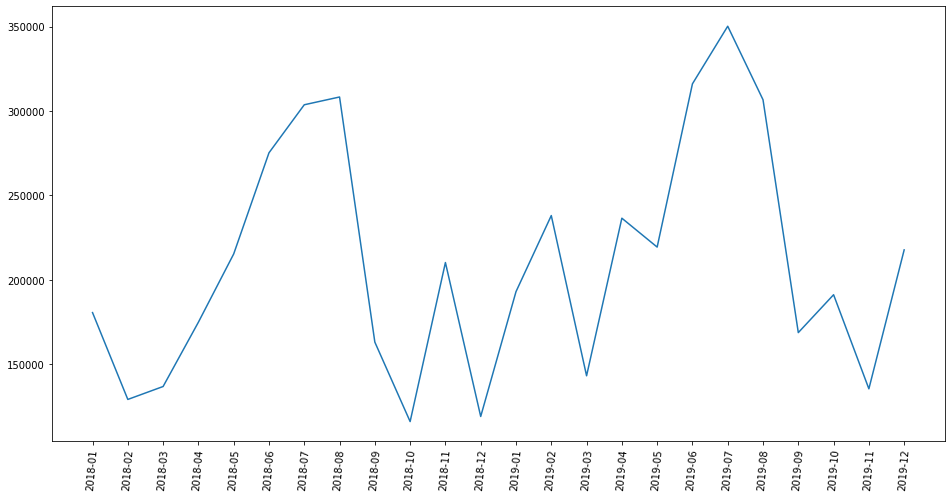

In [29]:
# Subset for carrier selected by user and rows with a NAS delay.
df_nas = df[(df['carrier'] == airline) & (df['nas_delay'] > 0)]

# Determine total number of NAS delay minutes by month.
df_nas = df_nas.groupby('date')['nas_delay'].sum()

# Plot NAS delay minutes by month for selected airline.
plt.figure(figsize=(16, 8))
plt.plot(df_nas)
plt.xticks(rotation=85)
plt.show()

In [30]:
# Display whether total NAS delay minutes are increasing or decreasing for past 2 months.
if df_nas.iloc[-1] > df_nas.iloc[-2]:
    print('Total NAS delay minutes for ' + airline + ' are increasing.')
else:
    print('Total NAS delay minutes for ' + airline + ' are decreasing.')

Total NAS delay minutes for DL are increasing.
